In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sb
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from sklearn.metrics import silhouette_samples, silhouette_score
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import pylab

import sklearn.mixture as mixture
import pyclustertend
from pyclustering.cluster.kmeans import kmeans, kmeans_visualizer

import random




/var/folders/fr/spl9qwlx3zz_v90n8qs7s84r0000gn/T/ipykernel_36258/2926122545.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [10]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import scale
import pandas as pd

#Estadistica de Hokpins
movies_df =pd.read_csv('./movies.csv', encoding='latin1')
def hopkins_statistic(X): 
  sample = scale(X)
  n,d = X.shape
  
  m = int(0.1 * n) # 10% de la muestra
  neighbours = NearestNeighbors(n_neighbors=1).fit(X)
  rand_sample = np.random.random_sample(size=(m, d)) * (sample.max(axis=0) - sample.min(axis=0)) + sample.min(axis=0)
    
  u_dist, _ = neighbours.kneighbors(rand_sample, return_distance=True)
  u_dist_sum = np.sum(u_dist)
    
  w_dist, _ = neighbours.kneighbors(sample[np.random.choice(n, m, replace=False), :], return_distance=True)
  w_dist_sum = np.sum(w_dist)
    
  H = u_dist_sum / (u_dist_sum + w_dist_sum)
  return H

variables = movies_df[['budget', 'revenue', 'runtime',  "popularity", "voteAvg", "voteCount", "genresAmount", "productionCoAmount", "productionCountriesAmount", "actorsAmount"]].dropna()
# variables1 = movies_df[["voteCount","genresAmount", "productionCoAmount", "productionCountriesAmount", "actorsAmount"]].dropna()
# variables = movies_df[["popularity", "voteAvg", "voteCount"]].dropna()
# variables2 = movies_df[["budget", "revenue", "runtime"]].dropna()
variables['budget'].astype(str).str.replace(' ', '')

# print(hopkins_statistic(variables1.values))
# print(hopkins_statistic(variables2.values))

variables  

,budget,revenue,runtime,popularity,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount
0,4000000,4257354.0,98.0,20.880,5.7,2077.0,2.0,2.0,1.0,25.0
2,11000000,775398007.0,121.0,100.003,8.2,16598.0,3.0,2.0,1.0,105.0
3,94000000,940335536.0,100.0,134.435,7.8,15928.0,2.0,1.0,1.0,24.0
4,55000000,677387716.0,142.0,58.751,8.5,22045.0,3.0,2.0,1.0,76.0
5,15000000,356296601.0,122.0,33.589,8.0,9951.0,1.0,2.0,1.0,40.0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0.0,100.0,16.662,6.8,108.0,2.0,1.0,1.0,10.0
9996,0,0.0,97.0,491.706,1.5,2.0,1.0,2.0,1.0,8.0
9997,0,0.0,112.0,565.658,6.1,30.0,1.0,1.0,17.0,1.0
9998,0,0.0,59.0,9.664,6.0,1.0,1.0,0.0,0.0,0.0


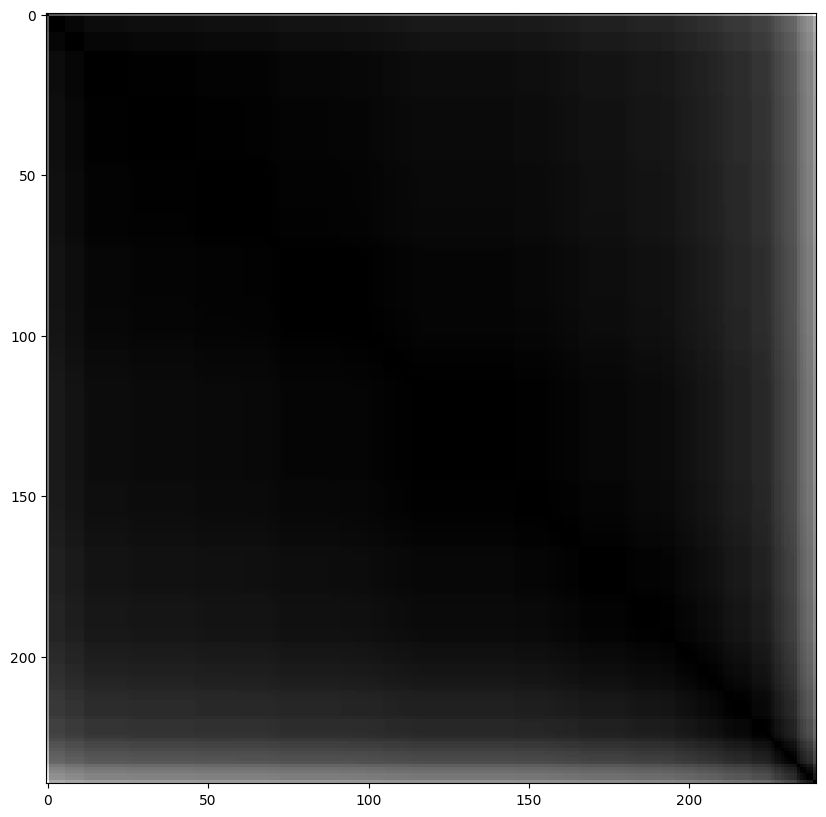

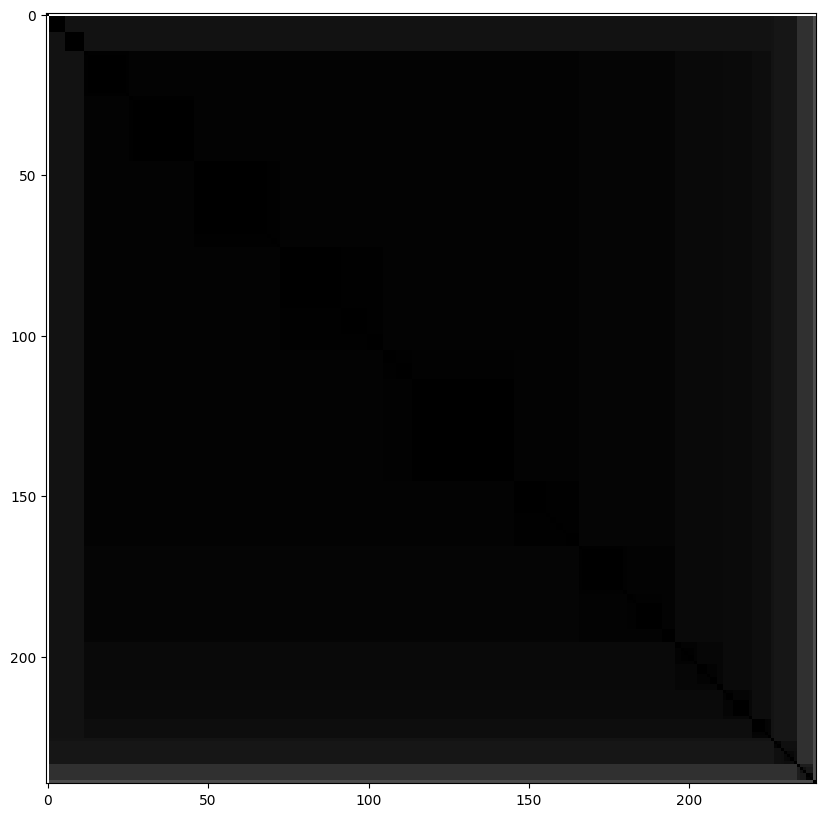

In [25]:
import pandas as pd
#import the packages
import pandas as pd # working with data
import numpy as np # working with arrays
from pyclustertend import vat
from pyclustertend import ivat
from sklearn.preprocessing import scale

movies_df =pd.read_csv('./movies.csv', encoding='latin1')
# movies_df[['budget', 'revenue', 'runtime']] = movies_df[['budget', 'revenue', 'runtime']].fillna(0)
movies_df[["budget", "runtime", "revenue", "popularity", "voteAvg", "voteCount", "genresAmount", "productionCoAmount", "productionCountriesAmount", "actorsAmount"]] = movies_df[["budget", "runtime", "revenue", "popularity", "voteAvg", "voteCount", "genresAmount", "productionCoAmount", "productionCountriesAmount", "actorsAmount"]].fillna(0)

# #drop rows with missing values
# movies_df = movies_df.dropna()

movies_df['budget'] = movies_df['budget'].astype(str).str.replace(' ', '').astype(float)

X = np.array(movies_df[["budget", "runtime", "revenue", "voteCount", "genresAmount", "productionCoAmount", "productionCountriesAmount", "actorsAmount"]])
Y = np.array(movies_df[["genres"]])

# X = np.array(movies_df[["runtime", "revenue"]])

# take random sample of 1000
X_sample = X[np.random.choice(X.shape[0], 30, replace=False), :]

X_scaled = scale(X_sample).flatten()

vat(X_scaled.reshape(-1, 1))

ivat(X_scaled.reshape(-1, 1))

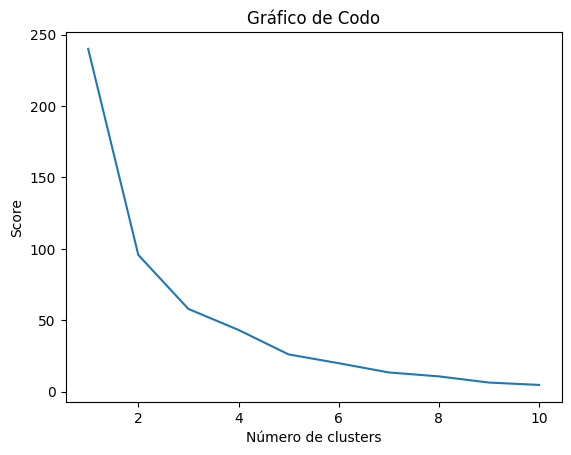

In [12]:
numeroClusters = range(1,11)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(X_scaled.reshape(-1, 1))
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")

plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()

KMEAN

In [26]:
km = cluster.KMeans(n_clusters=3, max_iter=3000).fit(X)
print (km)

KMeans(max_iter=3000, n_clusters=3)


In [27]:
centroides = km.cluster_centers_


centroids_df = pd.DataFrame(centroides, columns=["budget", "runtime", "revenue", "voteCount", "genresAmount", "productionCoAmount", "productionCountriesAmount", "actorsAmount"])
print(centroids_df)



         budget     runtime       revenue     voteCount  genresAmount  \
0  9.676548e+06   98.103744  1.724719e+07    760.762404      2.541046   
1  7.584076e+07  114.936722  2.698886e+08   4804.810166      2.988589   
2  1.581738e+08  129.690476  9.181333e+08  12174.505952      3.255952   

   productionCoAmount  productionCountriesAmount  actorsAmount  
0            3.100812                   1.788227   2351.403248  
1            3.807054                   1.454357    636.001037  
2            3.232143                   1.476190     67.273810  


In [16]:
especies = km.predict(X)


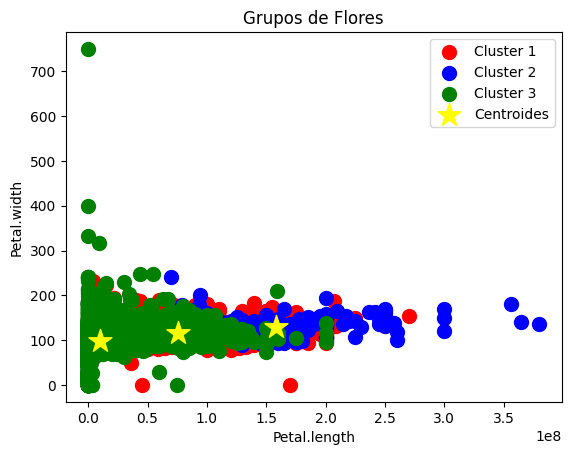

In [28]:
plt.scatter(X[especies == 0, 0], X[especies == 0, 1],s=100,c='red', label = "Cluster 1")
plt.scatter(X[especies == 1, 0], X[especies == 1, 1],s=100,c='blue', label = "Cluster 2")
plt.scatter(X[especies == 2, 0], X[especies == 2, 1],s=100,c='green', label = "Cluster 3")
# plt.scatter(X[especies == 3, 0], X[especies == 3, 1],s=100,c='brown', label = "Cluster 4")
# plt.scatter(X[especies == 4, 0], X[especies == 4, 1],s=100,c='orange', label = "Cluster 5")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], s=300, c="yellow",marker="*", label="Centroides")
plt.title("Grupos de Flores")
plt.xlabel("Petal.length")
plt.ylabel("Petal.width")
plt.legend()

In [30]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming X_scaled is your scaled dataset
print(X_scaled.shape)
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(X_scaled)

# Now X_pca can be plotted
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection')
plt.show()

(240, 1)


ValueError: n_components=2 must be between 0 and min(n_samples, n_features)=1 with svd_solver='full'

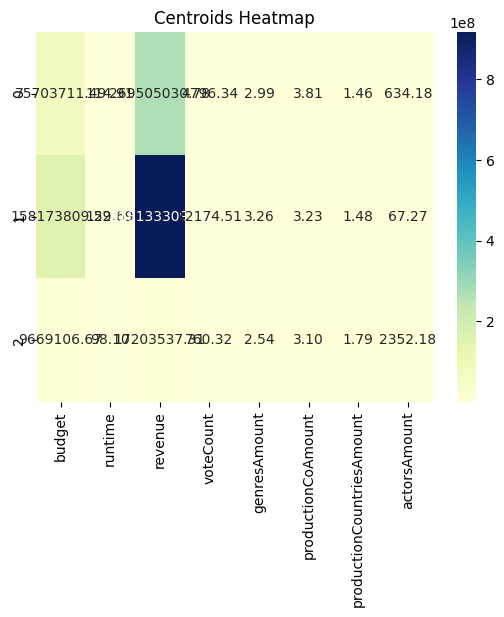

In [19]:
import seaborn as sns


# Assuming centroids_df is a DataFrame of your cluster centroids
sns.heatmap(centroids_df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Centroids Heatmap")
plt.show()

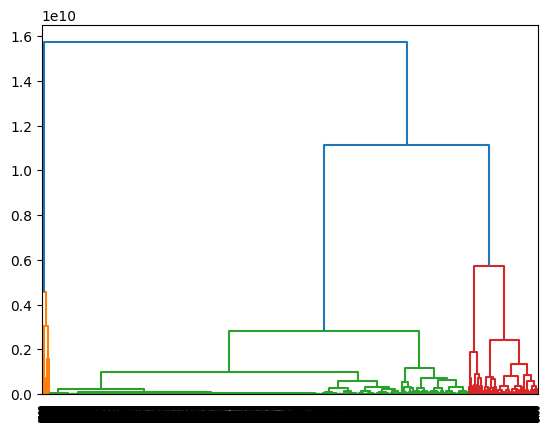

In [116]:
dendograma = sch.dendrogram(sch.linkage(X, method='ward'))

For n_clusters = 2 The average silhouette_score is : 0.8676886012029503
For n_clusters = 3 The average silhouette_score is : 0.8042355525411609
For n_clusters = 4 The average silhouette_score is : 0.7918381097126703
For n_clusters = 5 The average silhouette_score is : 0.753959296020232
For n_clusters = 6 The average silhouette_score is : 0.7279634308847808


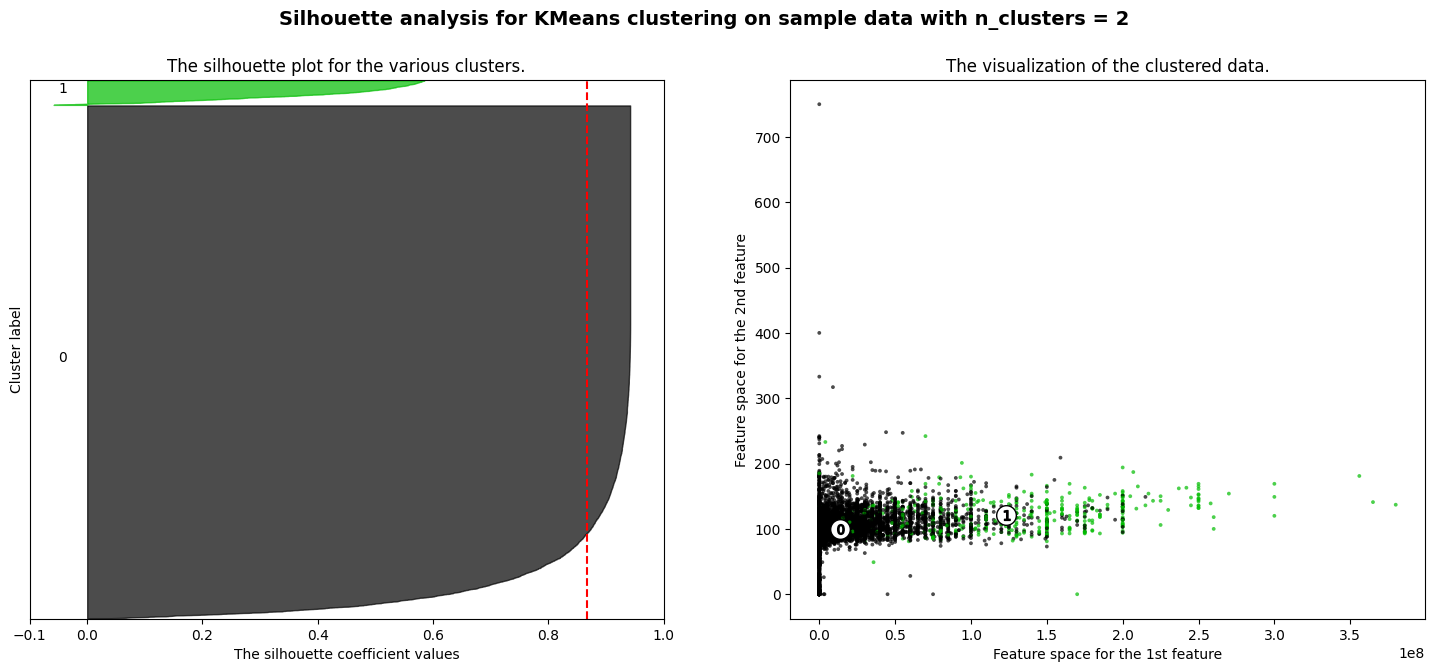

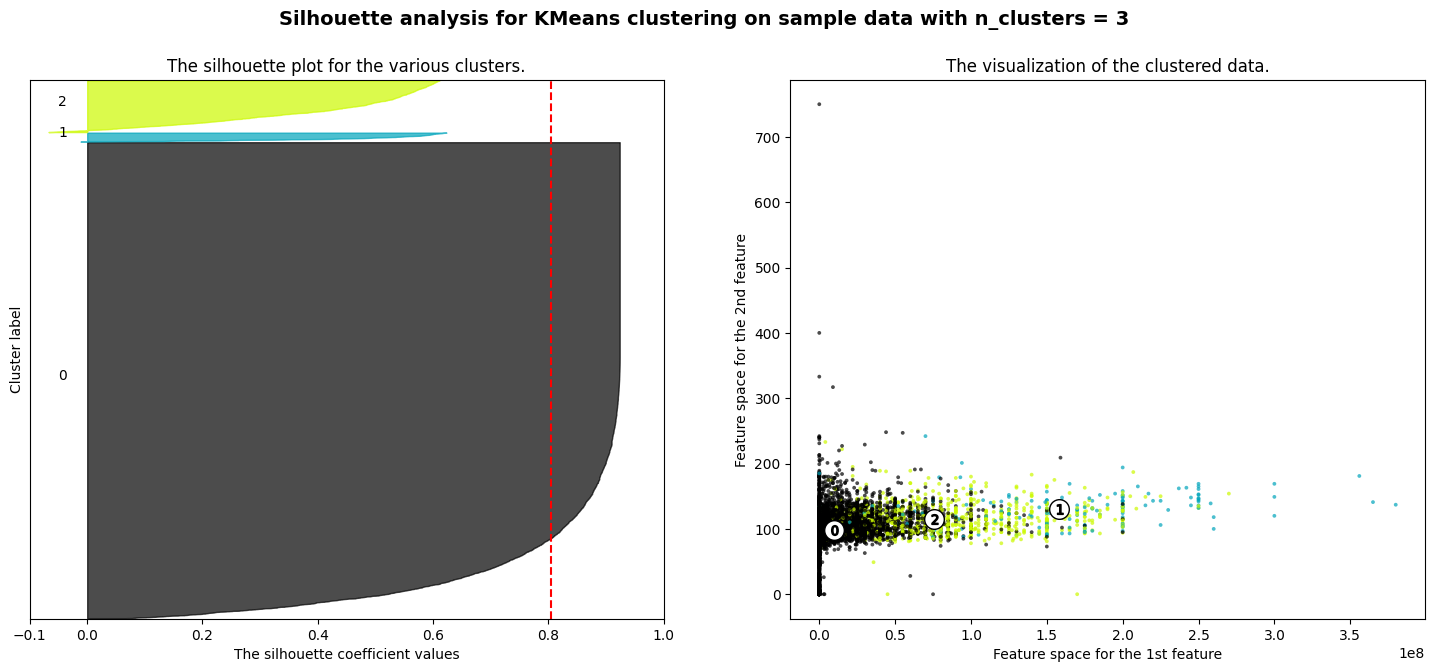

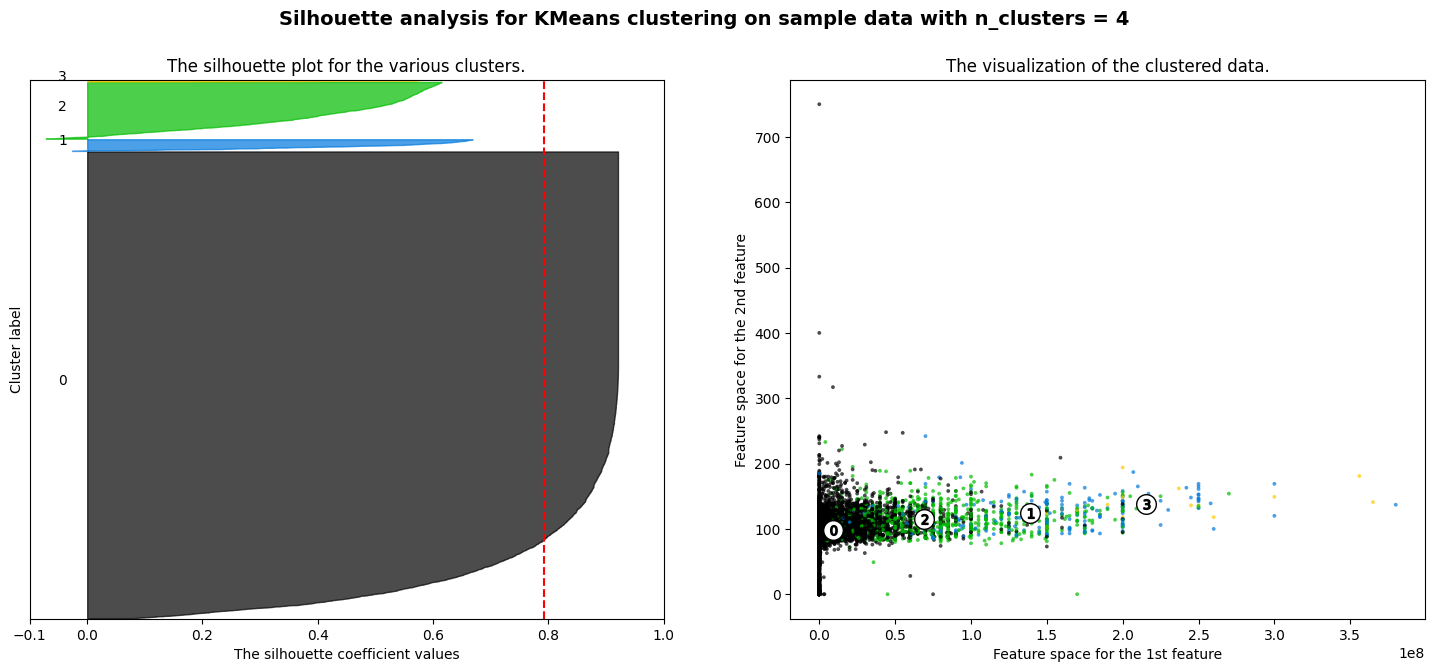

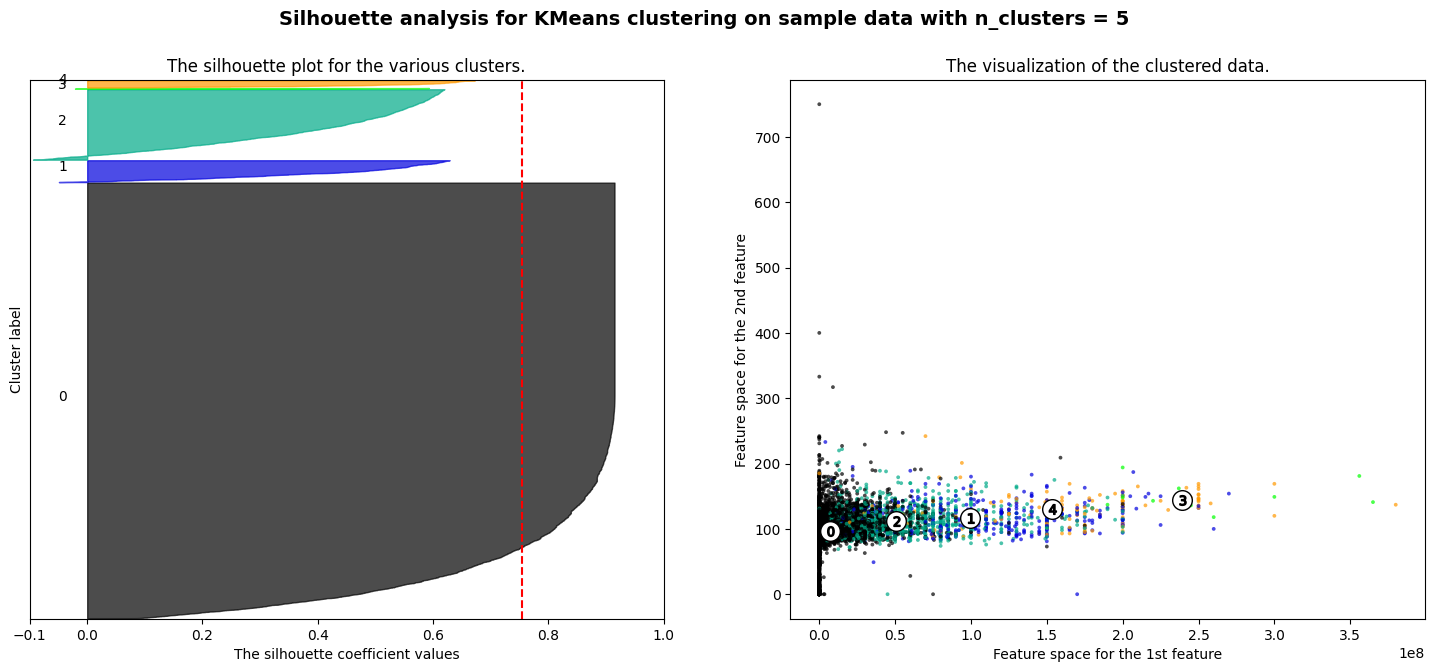

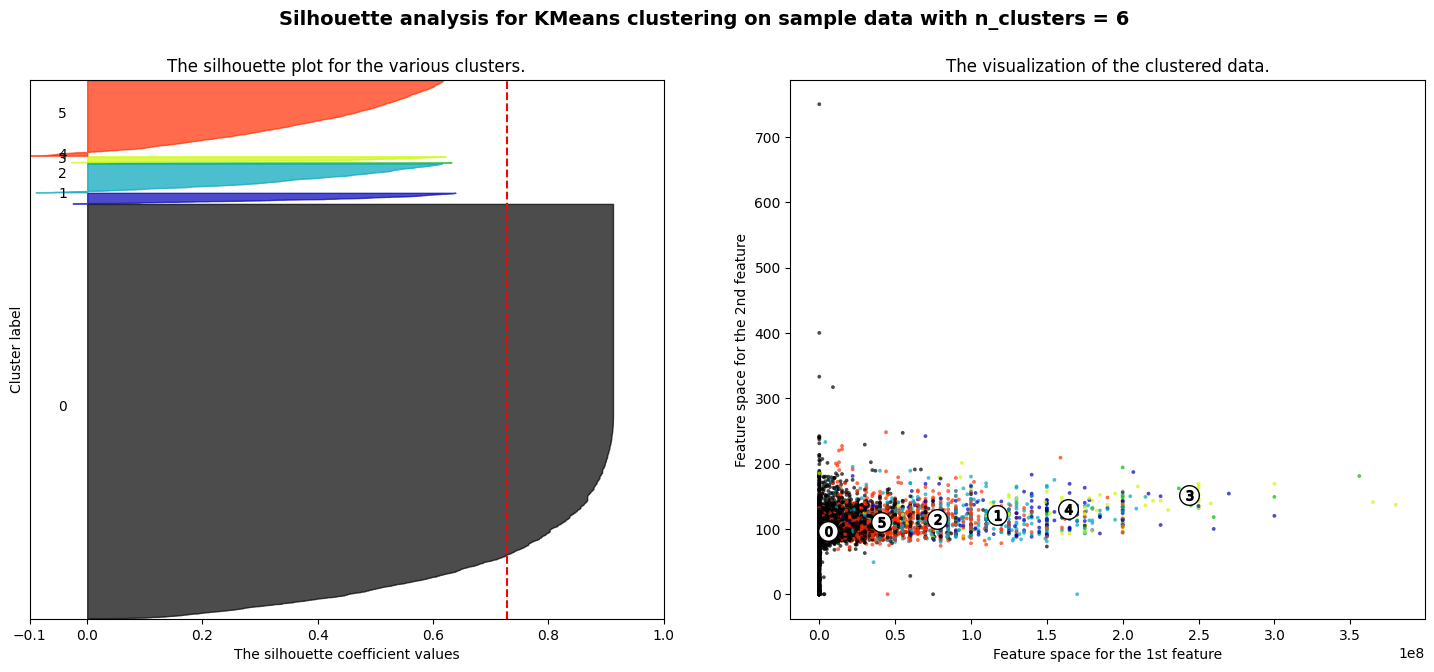

In [107]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


In [94]:
# Confusion Matrix Kmeans
from sklearn.metrics import confusion_matrix

confusion_matrix(especies, Y)

TypeError: '<' not supported between instances of 'str' and 'float'